<a href="https://colab.research.google.com/github/HafizAQ/ML_Practices/blob/main/Logistic_Regression_Implemenation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Courtesy: https://www.youtube.com/watch?v=GAiMnImkIZM
& https://www.youtube.com/watch?v=yIYKR4sgzI8
#Logistic Regression:
- Similar to linear regression (predicting a value), it only predicts **true or false** (instead of predicting something continuous like size)
- the S function can fit it
- Use for classification
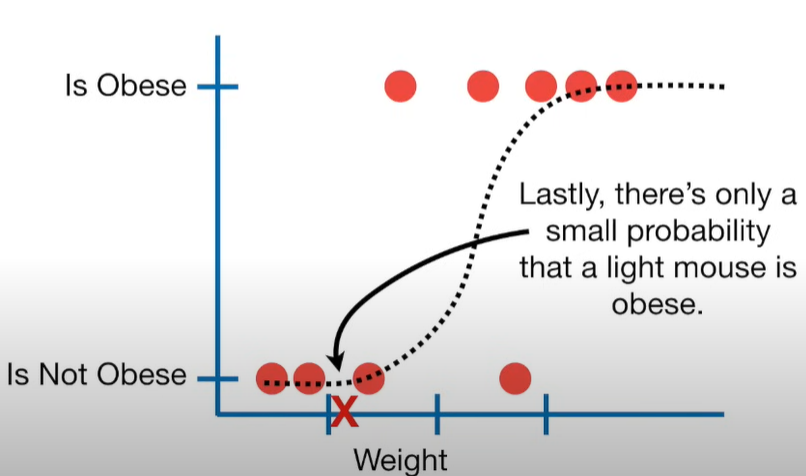



In [2]:
#Logistic Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  #Lesso regression, Ridge Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#Load Data

df = pd.read_csv('wisconsinBreastCancer.csv')

In [4]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Text(0.5, 0, 'worst_concave_points')

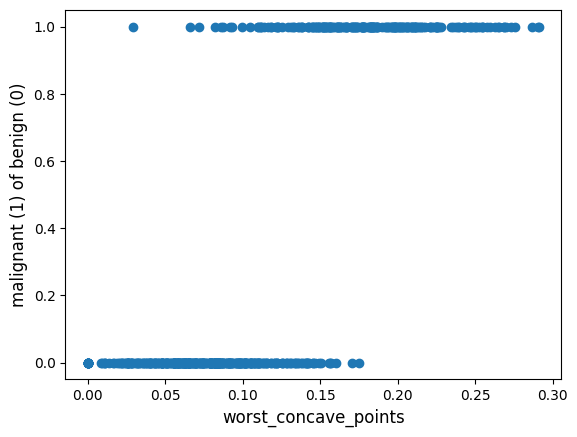

In [5]:
#Visualize Relationship between worst_concave_points and diagnosis
plt.scatter(df['worst_concave_points'], df['diagnosis'])
plt.ylabel('malignant (1) of benign (0)', fontsize=12)
plt.xlabel('worst_concave_points',fontsize=12)

#Linear Regression Vs Logistic Regression Calculation

- Linear Regressor uses least squares, and it can't calculate R^2
- Logistic Regressor calculates **maximum likelihood**(use of probability, shifting S line to calculate likelihoods, and curve with maximum likelihood could be selected)

In [9]:
#Exploring the name Logic Regreesion: Just predict the yes/ no classes (instead of continuous values)

X = df['worst_concave_points'].values.reshape(-1,1)
y = df['diagnosis']
X.shape, y.shape

((569, 1), (569,))

Text(0.5, 0, 'worst_concave_points')

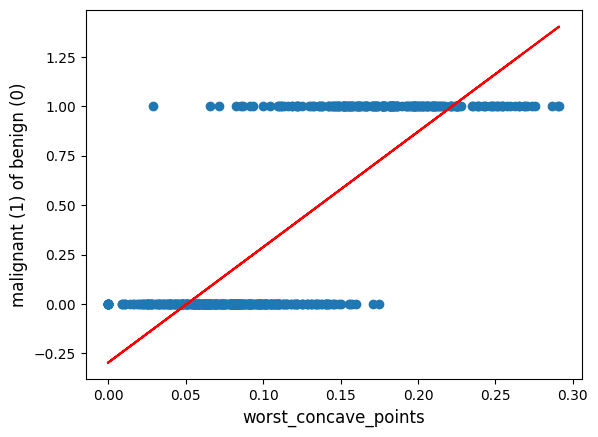

In [11]:
#Make linear regression instance
lr=LinearRegression()

#Model is learning the relationship between X and y
lr.fit(X,y)

predictions= lr.predict(X)

plt.scatter(df['worst_concave_points'], df['diagnosis'])
# plt.ylabel('malignant (1) of benign (0)', fontsize=12)
# plt.xlabel('worst_concave_points',fontsize=12)
plt.plot(df['worst_concave_points'], predictions, color='red') #Line (regressor)

plt.ylabel('malignant (1) of benign (0)', fontsize=12)
plt.xlabel('worst_concave_points',fontsize=12)

#What is Logistic Regression

- Linear Regression: Continuous response is modeled as a linear combination of the features: y=b0 + b1(x)

- Logistic Regression: Bound output to 0 and 1. Output the probabilities of a specific class. Probabilities can be converted into class predictions:
y = 1/(1 + e^(b0+b1(x)))

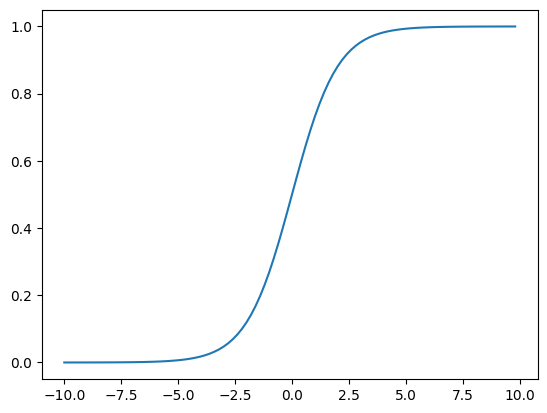

In [13]:
def sigmoid(x):
  a =[]
  for item in x:
    a.append(1/(1+np.exp(-item)))
  return a

x = np.arange(-10,10,0.2)
sig = sigmoid(x)

plt.plot(x,sig)

In [15]:
#Showing Predictions for Logic Regression
X = df['worst_concave_points'].values.reshape(-1,1)
y = df['diagnosis']

logreg = LogisticRegression(C = 1000)

# Training the model on the data, storing information learned from the data
# Model is learning the relationship between
logreg.fit(X,y)

# predictions = logreg.predict(X)

LogisticRegression(C=1000)

Text(0.5, 0, 'worst_concave_points')

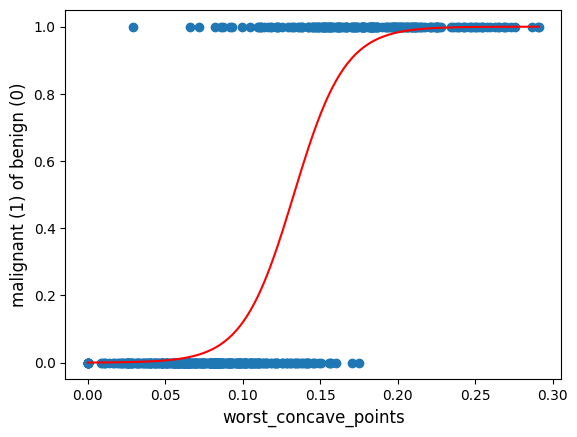

In [16]:
example_df = pd.DataFrame(data = {'worst_concave_points': df['worst_concave_points'].values, 'diagnosis': df['diagnosis'].values})

example_df['logistic_preds'] = pd.DataFrame(logreg.predict_proba(X))[1]
example_df = example_df.sort_values(['logistic_preds'])

plt.scatter(example_df['worst_concave_points'], example_df['diagnosis'])
plt.plot(example_df['worst_concave_points'], example_df['logistic_preds'].values, color='red')

plt.ylabel('malignant (1) of benign (0)', fontsize=12)
plt.xlabel('worst_concave_points',fontsize=12)

In [17]:
example_df

,worst_concave_points,diagnosis,logistic_preds
568,0.0000,0,0.000322
314,0.0000,0,0.000322
473,0.0000,0,0.000322
538,0.0000,0,0.000322
192,0.0000,0,0.000322
...,...,...,...
202,0.2733,1,0.999795
352,0.2756,1,0.999822
82,0.2867,1,0.999909
181,0.2903,1,0.999927


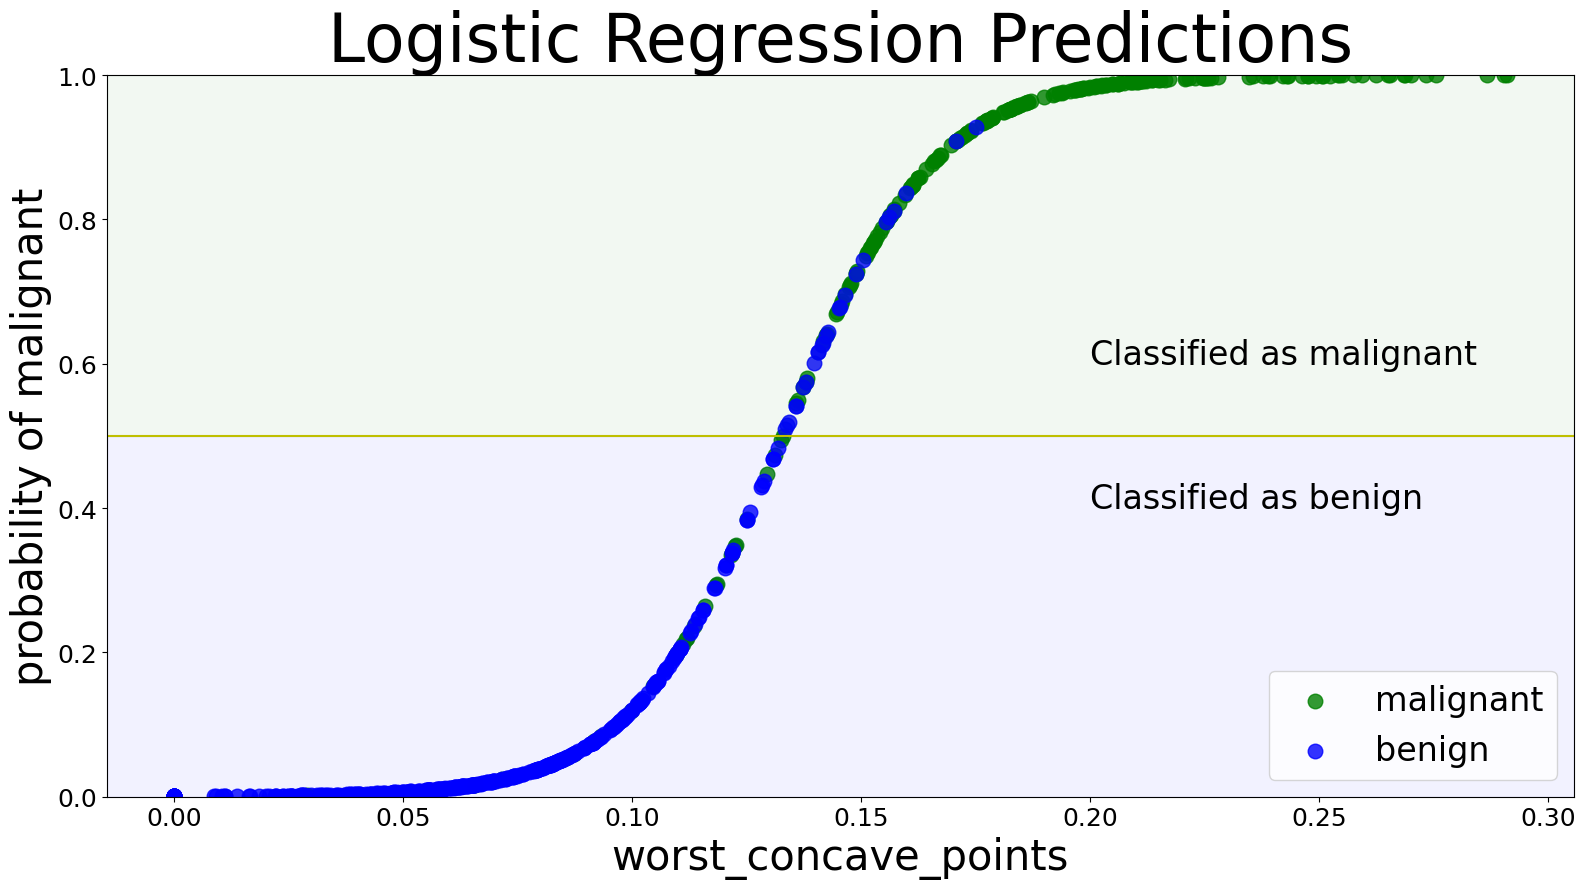

In [18]:
# This is just for the youtube thumbnail so that the black text has a white background.
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16,9), facecolor='white');


malignantFilter = example_df['diagnosis'] == 1
benignFilter = example_df['diagnosis'] == 0

ax.scatter(example_df.loc[malignantFilter, 'worst_concave_points'].values,
            example_df.loc[malignantFilter, 'logistic_preds'].values,
           color = 'g',
           s = 110,
           alpha = .8,
           label = 'malignant')


ax.scatter(example_df.loc[benignFilter, 'worst_concave_points'].values,
            example_df.loc[benignFilter, 'logistic_preds'].values,
           color = 'b',
           s = 110,
           alpha = .8,
           label = 'benign')

ax.axhline(y = .5, c = 'y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.2, .6, 'Classified as malignant', fontsize = 24)
ax.text(0.2, .4, 'Classified as benign', fontsize = 24)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 24)
ax.tick_params(labelsize = 18)
ax.set_xlabel('worst_concave_points', fontsize = 30)
ax.set_ylabel('probability of malignant', fontsize = 30)
ax.set_title('Logistic Regression Predictions', fontsize = 48)

fig.tight_layout()
#fig.savefig('LogisticRegressionPredictions.png', dpi = 950)

Advantages of Logistic Regression:

- Interpret **how the model** makes **predictions**
- Model **training relatively fast**
- **No tuning** is usually needed (excluding regularization)
- Can perform well with **small no. of observations** (instances)
- Output **well-calibrated predicted probabilities**  

DiDisadvantages of Logistic Regression:
- Linear relationship between the **features & log odds** of the response
- Performance is usually not competitive with the best supervised learning methods

In [19]:
#Evaluation Metrics (Correct predictions/ total number of data points)
score = logreg.score(X,y)
print(score)

0.9068541300527241


In [20]:
cm = metrics.confusion_matrix(y, logreg.predict(X))
print(cm)

[[332  25]
 [ 28 184]]


(2.5, -0.5)

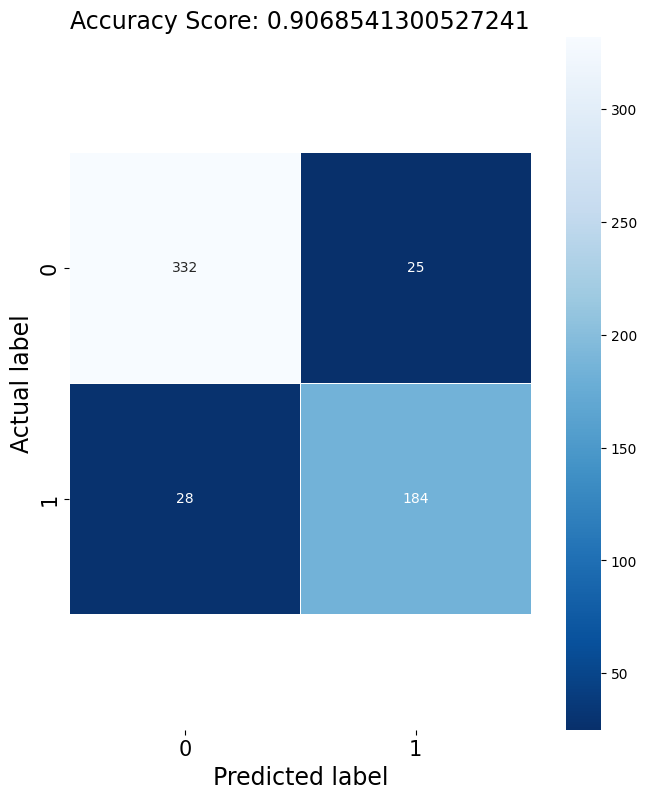

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', fontsize=17);
plt.xlabel('Predicted label', fontsize=17);
plt.title('Accuracy Score: {}'.format(score), fontsize=17);
plt.tick_params(labelsize=15);

# You can comment out the next 4 lines if you like
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values


In [24]:
# ignore this code

modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])

(2.5, -0.5)

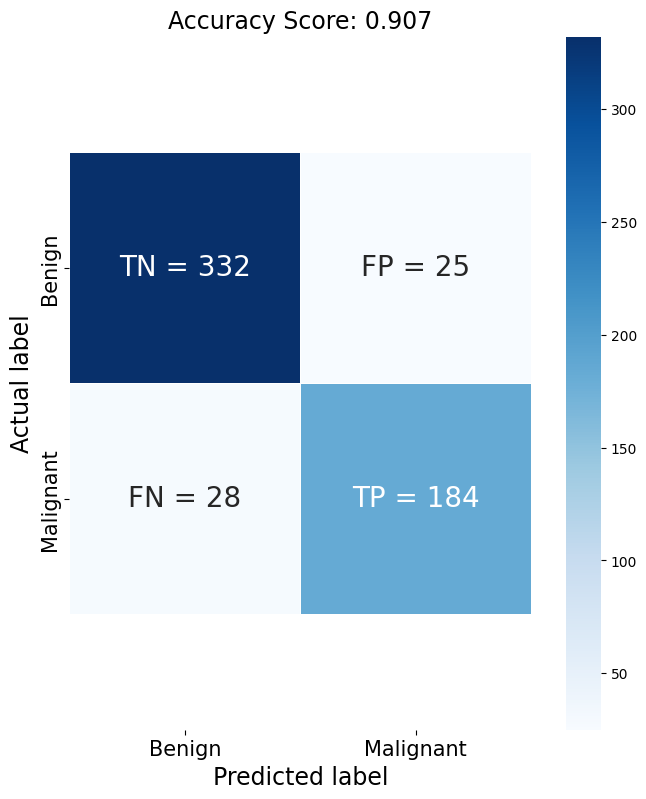

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Benign', 'Malignant'],
            yticklabels = ['Benign', 'Malignant'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

# You can comment out the next 4 lines if you like
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

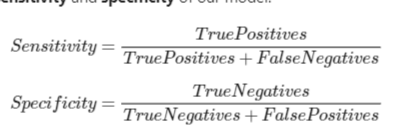

In [26]:
true_pos = cm[1,1]
false_pos = cm[0,1]
true_neg = cm[0,0]
false_neg = cm[1,0]

# Calculate Sensitivity, specificity
sensitivity = true_pos / (true_pos + false_neg)
specificity = true_neg / (true_neg + false_pos)

print('Sensitivity: {:.3f}'.format(sensitivity))
print('Specificity: {:.3f}'.format(specificity))

Sensitivity: 0.868
Specificity: 0.930


- **Sensitivity:** **True positive rate** (all of the cases in the data), how many did we accurately predict ? how sensitive model pick up on cases ? **Model's ability to detect cases**

- **Specificity:** **True Negative rate**, non-cases in the data, how many did we accurately predict? This indicates the model's ability to assign non-cases

In [27]:
type_one_error = 1 - specificity
type_two_error = 1 - sensitivity
print('Type 1 Error Rate: {:.3f}'.format(type_one_error))
print('Type 2 Error Rate: {:.3f}'.format(type_two_error))

Type 1 Error Rate: 0.070
Type 2 Error Rate: 0.132


- **Type I Error** rate is the proportion of instances which are incorrectly classified as positive cases (relative to the total number of negative cases)

Type I Error = 1 - Specificity

- **Type II Error** rate is the proportion of instances which are incorrectly classified as negative cases (relative to the total number of positive cases).

Type II Error = 1 - Sensitivity

#ROC (Receiver Operating Characteristic) Curve :
#####Visual representation of model performance across all thresholds

- Compare the **true positive rate** (sensitivity) to **false positive rate** (1-specificity) at each **threshold** for classification in an ROC Curve:
- Useful to help choose a threshold to balance sensitivity and specificity
- Harder to use when there are more than two classes

In [28]:
#Calculate ROC

# Generate data for the ROC curve using the `metrics.roc_curve` function
fpr, tpr, thresholds  = metrics.roc_curve(example_df['diagnosis'], example_df['logistic_preds'])

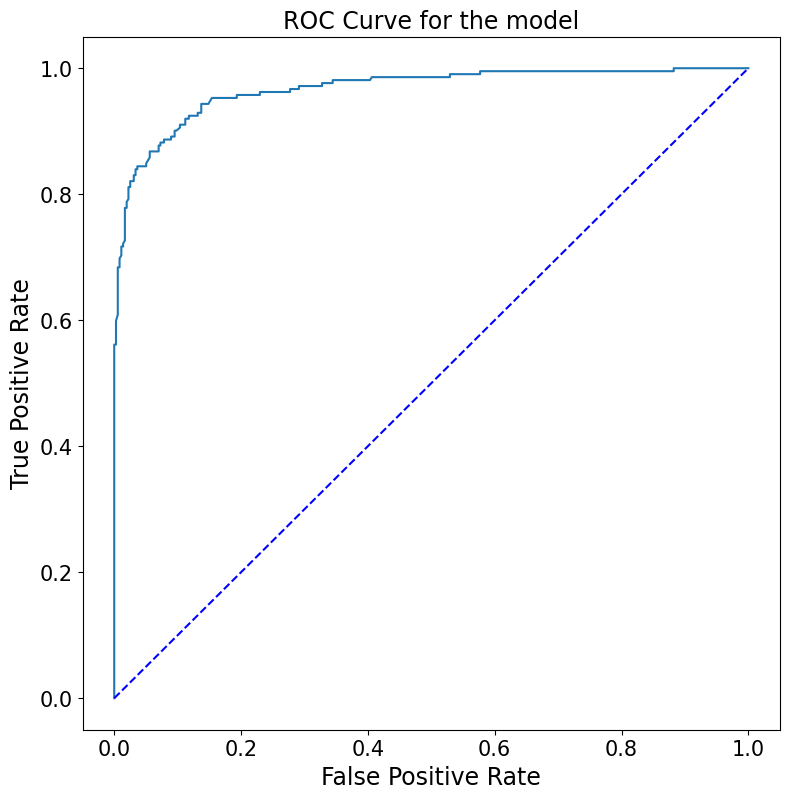

In [29]:
# Draw your ROC curve
plt.figure(figsize=(9,9))
plt.title("ROC Curve for the model", fontsize = 17)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'b--')
plt.xlabel('False Positive Rate', fontsize = 17)
plt.ylabel('True Positive Rate', fontsize = 17)
plt.tick_params(labelsize= 15)